1) Convertire la time series in un formato discreto (ad esempio usando SAX) per preparare i dati per il task

In [174]:
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import mean_squared_error 

In [175]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
all_features = pd.read_csv('../Task3/TimeSeries_DataSet/DataSet_Multi_All.csv', parse_dates=True, index_col='date', date_parser=dateparse)

In [176]:
all_features

,Temperature,Light,CO2,HumidityRatio
date,,,,
2015-02-02 14:19:00,0.869029,0.603964,0.208231,0.549737
2015-02-02 14:19:59,0.872357,0.596946,0.215163,0.551972
2015-02-02 14:21:00,0.874576,0.591029,0.220898,0.549997
2015-02-02 14:22:00,0.873190,0.509582,0.224045,0.544374
2015-02-02 14:23:00,0.879014,0.504267,0.226675,0.550376
...,...,...,...,...
2015-02-18 09:15:00,0.335593,0.443530,0.676157,0.404757
2015-02-18 09:16:00,0.344838,0.437080,0.681881,0.409306
2015-02-18 09:16:59,0.349461,0.437080,0.686214,0.411030


In [177]:
all_features["Temperature"][60*10:60*36]

date
2015-02-03 00:19:00    0.295840
2015-02-03 00:20:00    0.295840
2015-02-03 00:21:00    0.289676
2015-02-03 00:22:00    0.291217
2015-02-03 00:23:00    0.295840
                         ...   
2015-02-04 02:13:59    0.302003
2015-02-04 02:15:00    0.300462
2015-02-04 02:16:00    0.309707
2015-02-04 02:17:00    0.309707
2015-02-04 02:18:00    0.314330
Name: Temperature, Length: 1560, dtype: float64

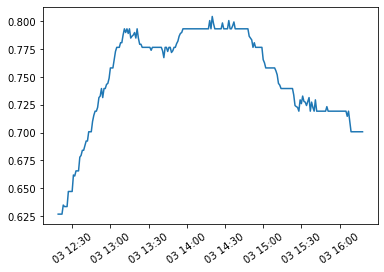

In [178]:
ts_2T = all_features["Temperature"][60*22:60*26]
plt.plot(ts_2T)
plt.xticks(rotation=35)
plt.show()

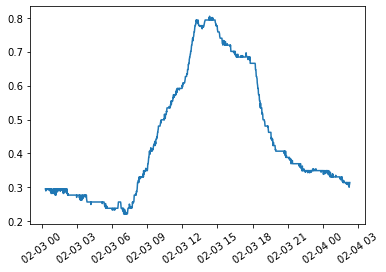

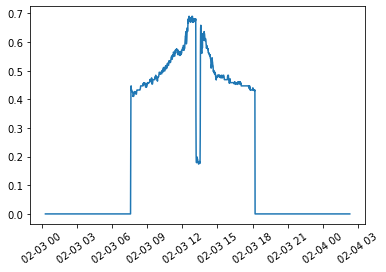

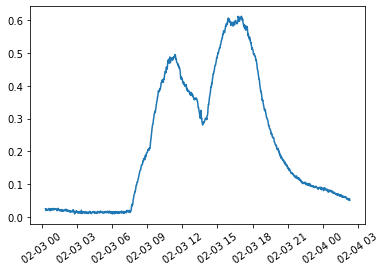

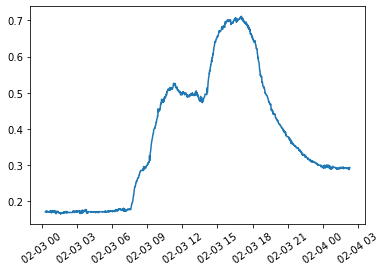

In [179]:
ts_Temperature = all_features["Temperature"][60*10:60*36]
plt.plot(ts_Temperature)
plt.xticks(rotation=35)
plt.show()

ts_Light = all_features["Light"][60*10:60*36]
plt.plot(ts_Light)
plt.xticks(rotation=35)
plt.show()

ts_CO2 = all_features["CO2"][60*10:60*36]
plt.plot(ts_CO2)
plt.xticks(rotation=35)
plt.show()

ts_HumidityRatio = all_features["HumidityRatio"][60*10:60*36]
plt.plot(ts_HumidityRatio)
plt.xticks(rotation=35)
plt.show()

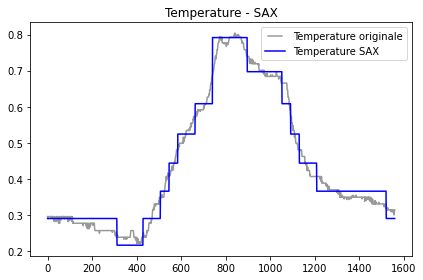

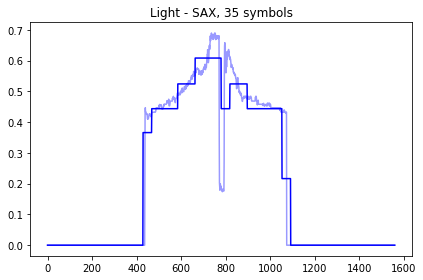

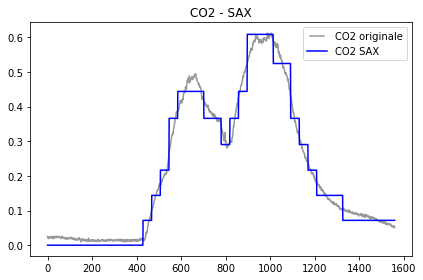

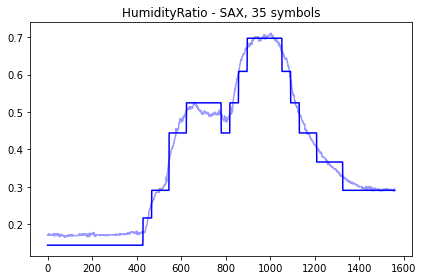

In [187]:
from matplotlib.legend_handler import HandlerLine2D

n_sax_symbols=35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_Temperature = sax.fit_transform(ts_Temperature)
sax_dataset_inv_Temperature = sax.inverse_transform(ts_sax_Temperature)

line1, = plt.plot(ts_Temperature.ravel(), "k", alpha=0.4, label='Temperature originale')
line2, = plt.plot(sax_dataset_inv_Temperature.ravel(), "b-", label='Temperature SAX')
plt.title("Temperature - SAX")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.tight_layout()
plt.show()


n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_Light = sax.fit_transform(ts_Light)
sax_dataset_inv_Light = sax.inverse_transform(ts_sax_Light)

plt.plot(ts_Light.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_Light.ravel(), "b-")
plt.title("Light - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_CO2 = sax.fit_transform(ts_CO2)
sax_dataset_inv_CO2 = sax.inverse_transform(ts_sax_CO2)

line1, = plt.plot(ts_CO2.ravel(), "k", alpha=0.4, label='CO2 originale')
line2, = plt.plot(sax_dataset_inv_CO2.ravel(), "b-", label='CO2 SAX')
plt.title("CO2 - SAX")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.tight_layout()
plt.show()

n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_HumidityRatio = sax.fit_transform(ts_HumidityRatio)
sax_dataset_inv_HumidityRatio = sax.inverse_transform(ts_sax_HumidityRatio)

plt.plot(ts_HumidityRatio.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_HumidityRatio.ravel(), "b-")
plt.title("HumidityRatio - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()



In [37]:
map_symbols_Temperature = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Temperature.ravel()))}
map_symbols_Temperature

{0.21653412444917097: 0,
 0.29050677112339396: 1,
 0.3661063568005698: 2,
 0.4438613119262475: 3,
 0.5244005127080407: 4,
 0.6084981344998833: 5,
 0.6971414348463417: 6,
 0.7916386077433746: 7}

In [38]:
seq_Temperature = np.array([map_symbols_Temperature[v] for v in sax_dataset_inv_Temperature.ravel()])
seq_Temperature

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
seq_T = seq_Temperature.tolist()
type(seq_T)

list

In [40]:
map_symbols_Light = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Light.ravel()))}
map_symbols_Light

{0.0: 0,
 0.21653412444917097: 1,
 0.3661063568005698: 2,
 0.4438613119262475: 3,
 0.5244005127080407: 4,
 0.6084981344998833: 5}

In [41]:
seq_Light = np.array([map_symbols_Light[v] for v in sax_dataset_inv_Light.ravel()])
seq_Light

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
seq_L = seq_Light.tolist()
type(seq_L)

list

In [43]:
map_symbols_CO2 = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_CO2.ravel()))}
map_symbols_CO2

{0.0: 0,
 0.07167928382863167: 1,
 0.14372923370582416: 2,
 0.21653412444917097: 3,
 0.29050677112339396: 4,
 0.3661063568005698: 5,
 0.4438613119262475: 6,
 0.5244005127080407: 7,
 0.6084981344998833: 8}

In [44]:
seq_CO2 = np.array([map_symbols_CO2[v] for v in sax_dataset_inv_CO2.ravel()])
seq_CO2

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
seq_C = seq_CO2.tolist()
type(seq_C)

list

In [46]:
map_symbols_HumidityRatio = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_HumidityRatio.ravel()))}
map_symbols_HumidityRatio

{0.14372923370582416: 0,
 0.21653412444917097: 1,
 0.29050677112339396: 2,
 0.3661063568005698: 3,
 0.4438613119262475: 4,
 0.5244005127080407: 5,
 0.6084981344998833: 6,
 0.6971414348463417: 7}

In [47]:
seq_HumidityRatio = np.array([map_symbols_HumidityRatio[v] for v in sax_dataset_inv_HumidityRatio.ravel()])
seq_HumidityRatio

array([0, 0, 0, ..., 2, 2, 2])

In [48]:
seq_H = seq_HumidityRatio.tolist()
type(seq_H)

list

In [49]:
from prefixspan import PrefixSpan

In [50]:
seq_T[0:15]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [51]:
#Quindi ogni TS sarà una sequenza, in cui ogni transazione avrà 5 items

In [53]:
len(seq_L)

1560

In [54]:
# Migliore rispetto mezz'ora 

In [55]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [56]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [57]:
ps = PrefixSpan(db)

In [58]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(6,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (5,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
  

In [59]:
ps.frequent(3, closed = True)

[(6,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (5,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
  

In [172]:
ps = PrefixSpan(db1)

In [173]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(127, [(0, 0), (0, 0)]),
 (126,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (125,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (124,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (123,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (122,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (120,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)

In [62]:
ps.frequent(3, closed = True)

[(8, [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (7,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (4, [(4, 6), (4, 6), (4, 6)]),
 (3,
  [(4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6)]),
 (3, [(3, 8), (3, 8), (3, 8)]),
 (3, [(0, 2), (0,

In [64]:
#mezz'ora

In [63]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [64]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [65]:
ps = PrefixSpan(db)

In [66]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(11,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (10,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (7,
  [(2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 1, 2),
   (2, 0, 

In [67]:
ps.frequent(3, closed = True)

[(11,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (10,
  [(1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0),
   (1, 0, 0, 0)]),
 (5,
  [(0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0)]),
 (4,
  [(0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   (0, 0, 0, 0),
   

In [68]:
ps = PrefixSpan(db1)

In [69]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(15,
  [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (14,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (7,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (6,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0,

In [70]:
ps.frequent(3, closed = True)

[(15,
  [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (14,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (3, [(3, 3), (3, 3), (3, 3)]),
 (6, [(4, 6), (4, 6), (4, 6)]),
 (5,
  [(4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6)]),
 (4,
  [(4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6)]),
 (3,
  [(4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
   (4, 6),
 

# Discretizzazione con PAA

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
all_features = pd.read_csv('DataSet_Multi_All.csv', parse_dates=True, index_col='date', date_parser=dateparse)

In [4]:
all_features

,Temperature,Light,CO2,HumidityRatio
date,,,,
2015-02-02 14:19:00,0.869029,0.603964,0.208231,0.549737
2015-02-02 14:19:59,0.872357,0.596946,0.215163,0.551972
2015-02-02 14:21:00,0.874576,0.591029,0.220898,0.549997
2015-02-02 14:22:00,0.873190,0.509582,0.224045,0.544374
2015-02-02 14:23:00,0.879014,0.504267,0.226675,0.550376
...,...,...,...,...
2015-02-18 09:15:00,0.335593,0.443530,0.676157,0.404757
2015-02-18 09:16:00,0.344838,0.437080,0.681881,0.409306
2015-02-18 09:16:59,0.349461,0.437080,0.686214,0.411030


In [5]:
all_features["Temperature"][60*10:60*36]

date
2015-02-03 00:19:00    0.295840
2015-02-03 00:20:00    0.295840
2015-02-03 00:21:00    0.289676
2015-02-03 00:22:00    0.291217
2015-02-03 00:23:00    0.295840
                         ...   
2015-02-04 02:13:59    0.302003
2015-02-04 02:15:00    0.300462
2015-02-04 02:16:00    0.309707
2015-02-04 02:17:00    0.309707
2015-02-04 02:18:00    0.314330
Name: Temperature, Length: 1560, dtype: float64

C:\Users\scali\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


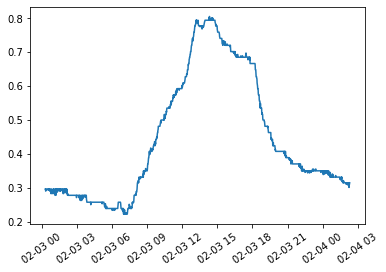

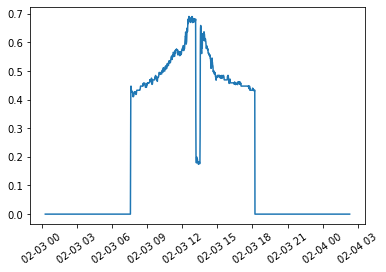

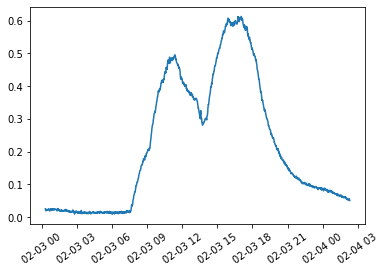

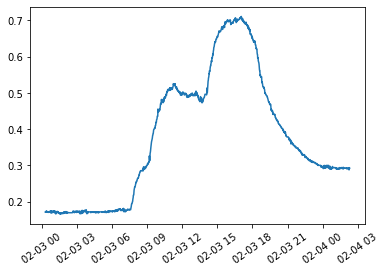

In [6]:
ts_Temperature = all_features["Temperature"][60*10:60*36]
plt.plot(ts_Temperature)
plt.xticks(rotation=35)
plt.show()

ts_Light = all_features["Light"][60*10:60*36]
plt.plot(ts_Light)
plt.xticks(rotation=35)
plt.show()

ts_CO2 = all_features["CO2"][60*10:60*36]
plt.plot(ts_CO2)
plt.xticks(rotation=35)
plt.show()

ts_HumidityRatio = all_features["HumidityRatio"][60*10:60*36]
plt.plot(ts_HumidityRatio)
plt.xticks(rotation=35)
plt.show()

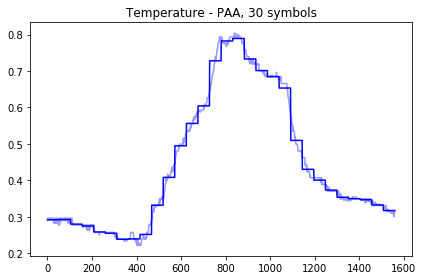

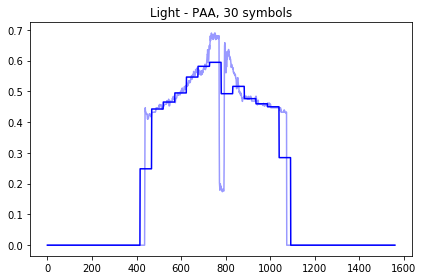

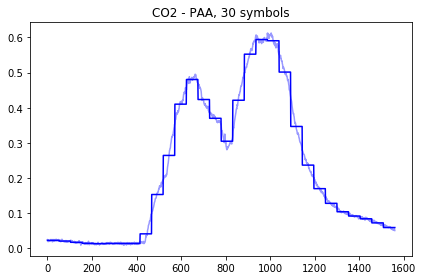

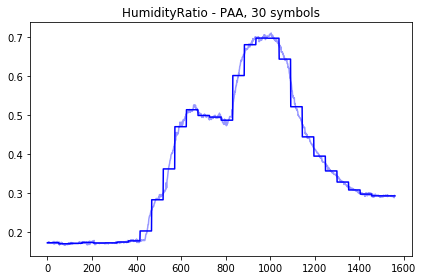

In [7]:
#Discretizzazione con PAA

from tslearn.piecewise import PiecewiseAggregateApproximation

n_paa_segments = 30
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa_Temperature = paa.fit_transform(ts_Temperature)
paa_dataset_inv_Temperature = paa.inverse_transform(ts_paa_Temperature)

plt.plot(ts_Temperature.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv_Temperature.ravel(), "b-")
plt.title("Temperature - PAA, %d symbols" % n_paa_segments)
plt.tight_layout()
plt.show()


n_paa_segments = 30
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa_Light = paa.fit_transform(ts_Light)
paa_dataset_inv_Light = paa.inverse_transform(ts_paa_Light)

plt.plot(ts_Light.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv_Light.ravel(), "b-")
plt.title("Light - PAA, %d symbols" % n_paa_segments)
plt.tight_layout()
plt.show()



n_paa_segments = 30
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa_CO2 = paa.fit_transform(ts_CO2)
paa_dataset_inv_CO2 = paa.inverse_transform(ts_paa_CO2)

plt.plot(ts_CO2.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv_CO2.ravel(), "b-")
plt.title("CO2 - PAA, %d symbols" % n_paa_segments)
plt.tight_layout()
plt.show()




n_paa_segments = 30
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa_HumidityRatio = paa.fit_transform(ts_HumidityRatio)
paa_dataset_inv_HumidityRatio = paa.inverse_transform(ts_paa_HumidityRatio)

plt.plot(ts_HumidityRatio.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv_HumidityRatio.ravel(), "b-")
plt.title("HumidityRatio - PAA, %d symbols" % n_paa_segments)
plt.tight_layout()
plt.show()

In [8]:
map_symbols_Temperature = {k: v for v, k in enumerate(np.unique(paa_dataset_inv_Temperature.ravel()))}
map_symbols_Temperature

{0.23824048832523498: 0,
 0.23910098376200162: 1,
 0.25143771482754673: 2,
 0.25458101220813245: 3,
 0.25819841175773534: 4,
 0.2746379044684143: 5,
 0.2796965746118304: 6,
 0.29167358065663324: 7,
 0.29229583975346896: 8,
 0.3170445656038893: 9,
 0.3317725494844155: 10,
 0.332369325589666: 11,
 0.3466042432144147: 12,
 0.34953478724665366: 13,
 0.3535172454663997: 14,
 0.3731006281853758: 15,
 0.400385208012329: 16,
 0.40797736162143183: 17,
 0.4301161550314116: 18,
 0.49470300885555385: 19,
 0.5095768638141543: 20,
 0.5561894038165254: 21,
 0.6042366955078854: 22,
 0.6532446367192164: 23,
 0.6846947967286984: 24,
 0.7012468887045199: 25,
 0.7280123266563983: 26,
 0.7330801401987883: 27,
 0.7824139419902174: 28,
 0.7893221185594109: 29}

In [9]:
seq_Temperature = np.array([map_symbols_Temperature[v] for v in paa_dataset_inv_Temperature.ravel()])
seq_Temperature

array([7, 7, 7, ..., 9, 9, 9])

In [10]:
seq_T = seq_Temperature.tolist()
type(seq_T)

list

In [11]:
map_symbols_Light = {k: v for v, k in enumerate(np.unique(paa_dataset_inv_Light.ravel()))}
map_symbols_Light

{0.0: 0,
 0.24837569678857443: 1,
 0.2847282005633024: 2,
 0.4428375766254486: 3,
 0.4500497921728789: 4,
 0.45984420213757965: 5,
 0.4654550157778586: 6,
 0.4764449482534487: 7,
 0.4925943077127694: 8,
 0.49509909725740325: 9,
 0.5164237616230469: 10,
 0.5467191214632017: 11,
 0.5816333973388461: 12,
 0.5945964452308427: 13}

In [12]:
seq_Light = np.array([map_symbols_Light[v] for v in paa_dataset_inv_Light.ravel()])
seq_Light

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
seq_L = seq_Light.tolist()
type(seq_L)

list

In [14]:
map_symbols_CO2 = {k: v for v, k in enumerate(np.unique(paa_dataset_inv_CO2.ravel()))}
map_symbols_CO2

{0.013419186929940386: 0,
 0.013830006704832606: 1,
 0.01396588866803933: 2,
 0.0140982000103151: 3,
 0.014512987141797261: 4,
 0.017338340137349858: 5,
 0.02082306779815675: 6,
 0.022774808872596253: 7,
 0.041389249257112466: 8,
 0.05933320637792242: 9,
 0.07255600915665897: 10,
 0.08419147256374543: 11,
 0.09199744502235599: 12,
 0.10417802322490542: 13,
 0.12812816148728262: 14,
 0.15323042010338928: 15,
 0.16990164923013443: 16,
 0.2368023899356098: 17,
 0.26436222759137806: 18,
 0.30475878755315544: 19,
 0.34670967281210185: 20,
 0.3699121627250979: 21,
 0.41009423038666426: 22,
 0.42125304423772614: 23,
 0.42332119888982006: 24,
 0.48022806916122734: 25,
 0.5013237085262459: 26,
 0.5522241851191256: 27,
 0.590437026998995: 28,
 0.5938060212004197: 29}

In [15]:
seq_CO2 = np.array([map_symbols_CO2[v] for v in paa_dataset_inv_CO2.ravel()])
seq_CO2

array([7, 7, 7, ..., 9, 9, 9])

In [16]:
seq_C = seq_CO2.tolist()
type(seq_C)

list

In [17]:
map_symbols_HumidityRatio = {k: v for v, k in enumerate(np.unique(paa_dataset_inv_HumidityRatio.ravel()))}
map_symbols_HumidityRatio

{0.16914011562778117: 0,
 0.1703949215689007: 1,
 0.17106172321874114: 2,
 0.17140595626593252: 3,
 0.17182304308094137: 4,
 0.17252090080833785: 5,
 0.17359935582990996: 6,
 0.17659553206233422: 7,
 0.20209947798870878: 8,
 0.282306464513539: 9,
 0.29228999870262046: 10,
 0.2923835847075012: 11,
 0.29683460909470594: 12,
 0.3075396070541728: 13,
 0.32788401730388295: 14,
 0.3564494918748204: 15,
 0.36164581816465274: 16,
 0.3945060917486721: 17,
 0.4440283700267429: 18,
 0.4702076787648195: 19,
 0.48695273646247045: 20,
 0.49493250377053316: 21,
 0.49906086226323654: 22,
 0.513842755699929: 23,
 0.5215608334297535: 24,
 0.6017201418857044: 25,
 0.6440257400863381: 26,
 0.6810907255419126: 27,
 0.6977602288623846: 28,
 0.6980868870261989: 29}

In [18]:
seq_HumidityRatio = np.array([map_symbols_HumidityRatio[v] for v in paa_dataset_inv_HumidityRatio.ravel()])
seq_HumidityRatio

array([ 4,  4,  4, ..., 10, 10, 10])

In [19]:
seq_H = seq_HumidityRatio.tolist()
type(seq_H)

list

In [20]:
#PrefixSpan

In [21]:
seq_T[0:15]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [22]:
len(seq_L)

1560

In [23]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [30]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [31]:
ps = PrefixSpan(db)

In [32]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(2, [(0, 0, 1, 6), (0, 0, 1, 6), (0, 0, 1, 6), (0, 0, 1, 6)]),
 (2, [(2, 1, 8, 8), (2, 1, 8, 8), (2, 1, 8, 8), (2, 1, 8, 8)]),
 (2,
  [(3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3),
   (3, 0, 3, 3)]),
 (2,
  [(4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2),
   (4, 0, 0, 2)]),
 (2,
  [(5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   (5, 0, 4, 5),
   

In [37]:
ps.frequent(2, closed = True) # non troviamo un supporto maggiore di 3

[(2, [(0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6)]),
 (2,
  [(0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5)]),
 (2,
  [(0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4)]),
 (2,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (2,
  [(0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3)]),
 (2, [(0, 1), (0, 1), (0, 1), (0, 1)]),
 (2, [(1, 8), (1, 8), (1, 8), (1, 8)]),
 (2,
  [(3, 15),
   (3, 15),

In [38]:
ps = PrefixSpan(db1)

In [39]:
ps.topk(10, closed = True)

[(2,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (2, [(0, 1), (0, 1), (0, 1), (0, 1)]),
 (2,
  [(0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3)]),
 (2,
  [(0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4)]),
 (2,
  [(0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5)]),
 (2, [(0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6)]),
 (2, [(1, 8), (1, 8), (1, 8), (1, 8)]),
 (2,
  [(3, 15),
   (3, 15),

In [40]:
ps.frequent(2, closed = True)

[(2, [(0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6)]),
 (2,
  [(0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5),
   (0, 5)]),
 (2,
  [(0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4)]),
 (2,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (2,
  [(0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3),
   (0, 3)]),
 (2, [(0, 1), (0, 1), (0, 1), (0, 1)]),
 (2, [(1, 8), (1, 8), (1, 8), (1, 8)]),
 (2,
  [(3, 15),
   (3, 15),

# Stesso dataset ma senza vincoli

In [72]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
all_features = pd.read_csv('../Task3/TimeSeries_DataSet/DataSet_Multi_All.csv', parse_dates=True, index_col='date', date_parser=dateparse)

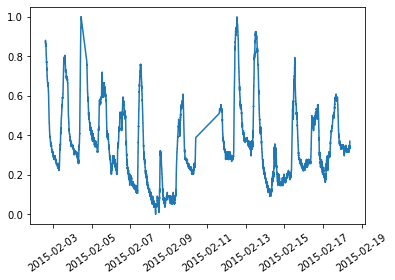

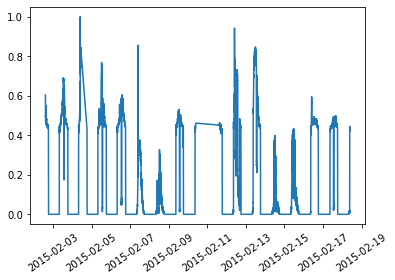

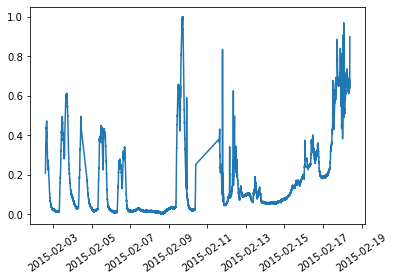

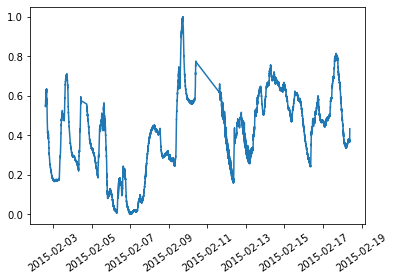

In [73]:
ts_Temperature = all_features["Temperature"]
plt.plot(ts_Temperature)
plt.xticks(rotation=35)
plt.show()

ts_Light = all_features["Light"]
plt.plot(ts_Light)
plt.xticks(rotation=35)
plt.show()

ts_CO2 = all_features["CO2"]
plt.plot(ts_CO2)
plt.xticks(rotation=35)
plt.show()

ts_HumidityRatio = all_features["HumidityRatio"]
plt.plot(ts_HumidityRatio)
plt.xticks(rotation=35)
plt.show()

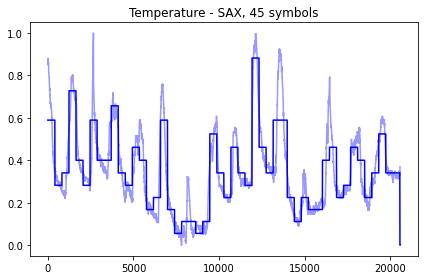

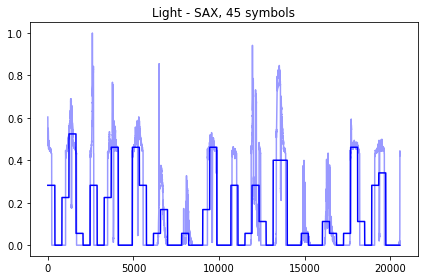

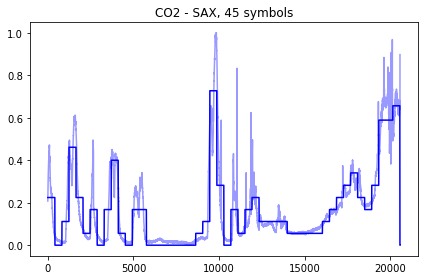

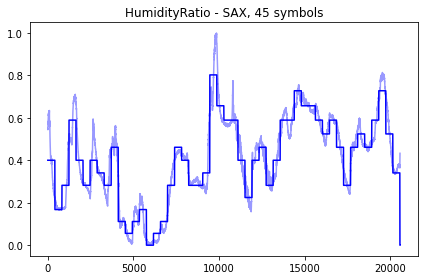

In [74]:
n_sax_symbols= 45
sax = SymbolicAggregateApproximation(n_segments=50, alphabet_size_avg=n_sax_symbols)
ts_sax_Temperature = sax.fit_transform(ts_Temperature)
sax_dataset_inv_Temperature = sax.inverse_transform(ts_sax_Temperature)

plt.plot(ts_Temperature.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_Temperature.ravel(), "b-")
plt.title("Temperature - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 45
sax = SymbolicAggregateApproximation(n_segments=50, alphabet_size_avg=n_sax_symbols)
ts_sax_Light = sax.fit_transform(ts_Light)
sax_dataset_inv_Light = sax.inverse_transform(ts_sax_Light)

plt.plot(ts_Light.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_Light.ravel(), "b-")
plt.title("Light - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 45
sax = SymbolicAggregateApproximation(n_segments=50, alphabet_size_avg=n_sax_symbols)
ts_sax_CO2 = sax.fit_transform(ts_CO2)
sax_dataset_inv_CO2 = sax.inverse_transform(ts_sax_CO2)

plt.plot(ts_CO2.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_CO2.ravel(), "b-")
plt.title("CO2 - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 45
sax = SymbolicAggregateApproximation(n_segments=50, alphabet_size_avg=n_sax_symbols)
ts_sax_HumidityRatio = sax.fit_transform(ts_HumidityRatio)
sax_dataset_inv_HumidityRatio = sax.inverse_transform(ts_sax_HumidityRatio)

plt.plot(ts_HumidityRatio.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_HumidityRatio.ravel(), "b-")
plt.title("HumidityRatio - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()

In [75]:
map_symbols_Temperature = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Temperature.ravel()))}
map_symbols_Temperature

{0.0: 0,
 0.05573168774297989: 1,
 0.11163715450694481: 2,
 0.16789400478810546: 3,
 0.22468771507277532: 4,
 0.28221614706250825: 5,
 0.3406948270877954: 6,
 0.4003633845347481: 7,
 0.46149369421815845: 8,
 0.5244005127080407: 9,
 0.5894557978497783: 10,
 0.6571085664248891: 11,
 0.7279132908816444: 12,
 0.8819982053373723: 13}

In [76]:
seq_Temperature = np.array([map_symbols_Temperature[v] for v in sax_dataset_inv_Temperature.ravel()])
seq_Temperature

array([10, 10, 10, ...,  0,  0,  0])

In [77]:
seq_T = seq_Temperature.tolist()
type(seq_T)

list

In [78]:
map_symbols_Light = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Light.ravel()))}
map_symbols_Light

{0.0: 0,
 0.05573168774297989: 1,
 0.11163715450694481: 2,
 0.16789400478810546: 3,
 0.22468771507277532: 4,
 0.28221614706250825: 5,
 0.3406948270877954: 6,
 0.4003633845347481: 7,
 0.46149369421815845: 8,
 0.5244005127080407: 9}

In [79]:
seq_Light = np.array([map_symbols_Light[v] for v in sax_dataset_inv_Light.ravel()])
seq_Light

array([5, 5, 5, ..., 0, 0, 0])

In [80]:
seq_L = seq_Light.tolist()
type(seq_L)

list

In [81]:
map_symbols_CO2 = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_CO2.ravel()))}
map_symbols_CO2

{0.0: 0,
 0.05573168774297989: 1,
 0.11163715450694481: 2,
 0.16789400478810546: 3,
 0.22468771507277532: 4,
 0.28221614706250825: 5,
 0.3406948270877954: 6,
 0.4003633845347481: 7,
 0.46149369421815845: 8,
 0.5894557978497783: 9,
 0.6571085664248891: 10,
 0.7279132908816444: 11}

In [82]:
seq_CO2 = np.array([map_symbols_CO2[v] for v in sax_dataset_inv_CO2.ravel()])
seq_CO2

array([4, 4, 4, ..., 0, 0, 0])

In [83]:
seq_C = seq_CO2.tolist()
type(seq_C)

list

In [84]:
map_symbols_HumidityRatio = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_HumidityRatio.ravel()))}
map_symbols_HumidityRatio

{0.0: 0,
 0.05573168774297989: 1,
 0.11163715450694481: 2,
 0.16789400478810546: 3,
 0.22468771507277532: 4,
 0.28221614706250825: 5,
 0.3406948270877954: 6,
 0.4003633845347481: 7,
 0.46149369421815845: 8,
 0.5244005127080407: 9,
 0.5894557978497783: 10,
 0.6571085664248891: 11,
 0.7279132908816444: 12,
 0.8025718880593093: 13}

In [85]:
seq_HumidityRatio = np.array([map_symbols_HumidityRatio[v] for v in sax_dataset_inv_HumidityRatio.ravel()])
seq_HumidityRatio

array([7, 7, 7, ..., 0, 0, 0])

In [86]:
seq_H = seq_HumidityRatio.tolist()
type(seq_H)

list

In [87]:
seq_T[0:15]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [88]:
len(seq_L)

20560

In [89]:
# Migliore rispetto mezz'ora 

In [90]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [91]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [92]:
ps = PrefixSpan(db)

In [93]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(8,
  [(5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1)]),
 (8,
  [(5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3)]),
 (8,
  [(5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5)]),
 (8,
  [(6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2),
   (6, 0, 1, 2)]),
 (8,
  [(6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5),
   (6, 4, 2, 5)

In [94]:
ps.frequent(3, closed = True)

[(7,
  [(10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7)]),
 (6,
  [(10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7)

In [95]:
ps = PrefixSpan(db1)

In [96]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(62, [(0, 0), (0, 0), (0, 0)]),
 (62, [(0, 1), (0, 1), (0, 1)]),
 (61, [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (61, [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]),
 (59,
  [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (59,
  [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]),
 (57,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (57,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (56,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0

In [97]:
ps.frequent(3, closed = True)

[(15,
  [(5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4)]),
 (14,
  [(5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4)]),
 (13,
  [(5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),

In [98]:
#mezz'ora

In [99]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [100]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [101]:
ps = PrefixSpan(db)

In [102]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(15,
  [(3, 0, 0, 0),
   (3, 0, 0, 0),
   (3, 0, 0, 0),
   (3, 0, 0, 0),
   (3, 0, 0, 0),
   (3, 0, 0, 0)]),
 (15,
  [(4, 1, 0, 1),
   (4, 1, 0, 1),
   (4, 1, 0, 1),
   (4, 1, 0, 1),
   (4, 1, 0, 1),
   (4, 1, 0, 1)]),
 (15,
  [(5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1),
   (5, 0, 0, 1)]),
 (15,
  [(5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3)]),
 (15,
  [(5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5),
   (5, 0, 1, 5)]),
 (15, [(6, 4, 2, 5), (6, 4, 2, 5), (6, 4, 2, 5)]),
 (15, [(7, 0, 0, 6), (7, 0, 0, 6), (7, 0, 0, 6)]),
 (15,
  [(7, 1, 4, 7),
   (7, 1, 4, 7),
   (7, 1, 4, 7),
   (7, 1, 4, 7),
   (7, 1, 4, 7),
   (7, 1, 4, 7)]),
 (15,
  [(7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3, 5),
   (7, 4, 3

In [103]:
ps.frequent(3, closed = True)

[(14,
  [(10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7)]),
 (13,
  [(10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7),
   (10, 5, 4, 7)]),
 (15,
  [(5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0, 0, 3),
   (5, 0,

In [88]:
ps = PrefixSpan(db1)

In [89]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(118, [(0, 0), (0, 0), (0, 0)]),
 (117, [(0, 1), (0, 1), (0, 1)]),
 (116, [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (115, [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]),
 (114,
  [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (112,
  [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]),
 (111,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (110,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (109,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (109,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)])]

In [90]:
ps.frequent(3, closed = True)

[(28,
  [(5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4)]),
 (26,
  [(5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4),
   (5, 4)]),
 (118, [(0, 0), (0, 0), (0, 0)]),
 (116, [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (114,
  [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]),
 (111,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (109,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),


# Dataset 1D

In [143]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
all_features = pd.read_csv('../Task3/TimeSeries_DataSet/DataSet_Multi_1Dt.csv', parse_dates=True, index_col='date', date_parser=dateparse)

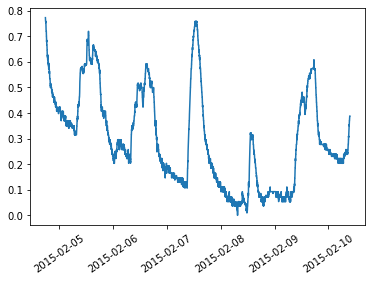

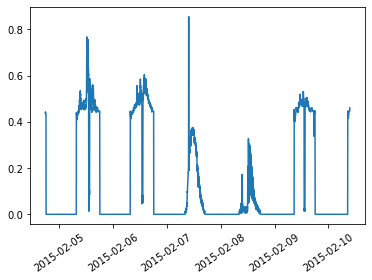

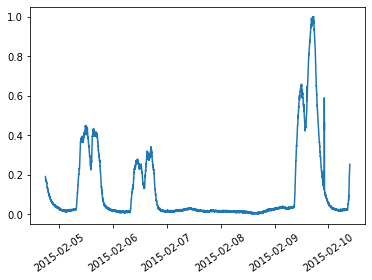

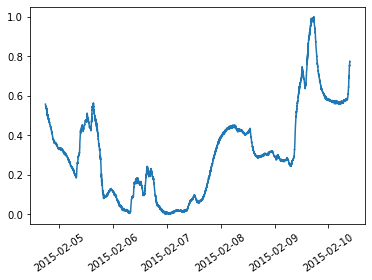

In [144]:
ts_Temperature = all_features["Temperature"]
plt.plot(ts_Temperature)
plt.xticks(rotation=35)
plt.show()

ts_Light = all_features["Light"]
plt.plot(ts_Light)
plt.xticks(rotation=35)
plt.show()

ts_CO2 = all_features["CO2"]
plt.plot(ts_CO2)
plt.xticks(rotation=35)
plt.show()

ts_HumidityRatio = all_features["HumidityRatio"]
plt.plot(ts_HumidityRatio)
plt.xticks(rotation=35)
plt.show()

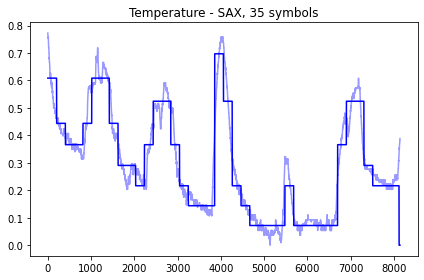

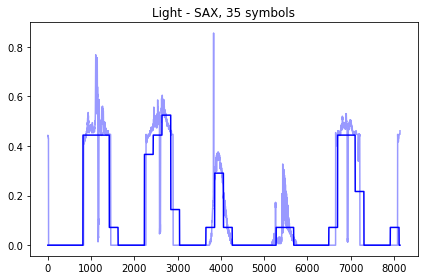

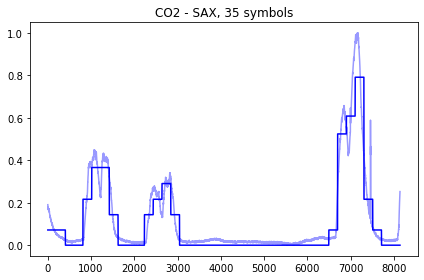

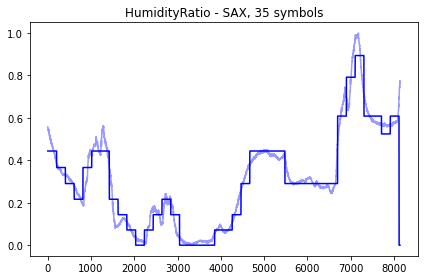

In [145]:
n_sax_symbols=35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_Temperature = sax.fit_transform(ts_Temperature)
sax_dataset_inv_Temperature = sax.inverse_transform(ts_sax_Temperature)

plt.plot(ts_Temperature.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_Temperature.ravel(), "b-")
plt.title("Temperature - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_Light = sax.fit_transform(ts_Light)
sax_dataset_inv_Light = sax.inverse_transform(ts_sax_Light)

plt.plot(ts_Light.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_Light.ravel(), "b-")
plt.title("Light - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_CO2 = sax.fit_transform(ts_CO2)
sax_dataset_inv_CO2 = sax.inverse_transform(ts_sax_CO2)

plt.plot(ts_CO2.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_CO2.ravel(), "b-")
plt.title("CO2 - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()


n_sax_symbols= 35
sax = SymbolicAggregateApproximation(n_segments=40, alphabet_size_avg=n_sax_symbols)
ts_sax_HumidityRatio = sax.fit_transform(ts_HumidityRatio)
sax_dataset_inv_HumidityRatio = sax.inverse_transform(ts_sax_HumidityRatio)

plt.plot(ts_HumidityRatio.ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv_HumidityRatio.ravel(), "b-")
plt.title("HumidityRatio - SAX, %d symbols" % n_sax_symbols)
plt.tight_layout()
plt.show()



In [146]:
map_symbols_Temperature = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Temperature.ravel()))}
map_symbols_Temperature

{0.0: 0,
 0.07167928382863167: 1,
 0.14372923370582416: 2,
 0.21653412444917097: 3,
 0.29050677112339396: 4,
 0.3661063568005698: 5,
 0.4438613119262475: 6,
 0.5244005127080407: 7,
 0.6084981344998833: 8,
 0.6971414348463417: 9}

In [147]:
seq_Temperature = np.array([map_symbols_Temperature[v] for v in sax_dataset_inv_Temperature.ravel()])
seq_Temperature

array([8, 8, 8, ..., 0, 0, 0])

In [148]:
seq_T = seq_Temperature.tolist()
type(seq_T)

list

In [149]:
map_symbols_Light = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_Light.ravel()))}
map_symbols_Light

{0.0: 0,
 0.07167928382863167: 1,
 0.14372923370582416: 2,
 0.21653412444917097: 3,
 0.29050677112339396: 4,
 0.3661063568005698: 5,
 0.4438613119262475: 6,
 0.5244005127080407: 7}

In [150]:
seq_Light = np.array([map_symbols_Light[v] for v in sax_dataset_inv_Light.ravel()])
seq_Light

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
seq_L = seq_Light.tolist()
type(seq_L)

list

In [152]:
map_symbols_CO2 = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_CO2.ravel()))}
map_symbols_CO2

{0.0: 0,
 0.07167928382863167: 1,
 0.14372923370582416: 2,
 0.21653412444917097: 3,
 0.29050677112339396: 4,
 0.3661063568005698: 5,
 0.5244005127080407: 6,
 0.6084981344998833: 7,
 0.7916386077433746: 8}

In [153]:
seq_CO2 = np.array([map_symbols_CO2[v] for v in sax_dataset_inv_CO2.ravel()])
seq_CO2

array([1, 1, 1, ..., 0, 0, 0])

In [154]:
seq_C = seq_CO2.tolist()
type(seq_C)

list

In [155]:
map_symbols_HumidityRatio = {k: v for v, k in enumerate(np.unique(sax_dataset_inv_HumidityRatio.ravel()))}
map_symbols_HumidityRatio

{0.0: 0,
 0.07167928382863167: 1,
 0.14372923370582416: 2,
 0.21653412444917097: 3,
 0.29050677112339396: 4,
 0.3661063568005698: 5,
 0.4438613119262475: 6,
 0.5244005127080407: 7,
 0.6084981344998833: 8,
 0.7916386077433746: 9,
 0.893800631179489: 10}

In [156]:
seq_HumidityRatio = np.array([map_symbols_HumidityRatio[v] for v in sax_dataset_inv_HumidityRatio.ravel()])
seq_HumidityRatio

array([6, 6, 6, ..., 0, 0, 0])

In [157]:
seq_H = seq_HumidityRatio.tolist()
type(seq_H)

list

In [158]:
from prefixspan import PrefixSpan

In [159]:
seq_T[0:15]

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [160]:
len(seq_L)

8143

In [161]:
# Migliore rispetto mezz'ora 

In [162]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [163]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<60:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [164]:
ps = PrefixSpan(db)

In [165]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(15,
  [(1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4)]),
 (13,
  [(1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),


In [166]:
ps.frequent(2, closed = True)

[(4,
  [(8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6)]),
 (3,
  [(8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
  

In [131]:
ps = PrefixSpan(db1)

In [132]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(66,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (65,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (64,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (63,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (61,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (60,
  [(0, 0),
   (0, 0),
   (0, 0

In [133]:
ps.frequent(3, closed = True)

[(11,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (10,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (9,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),


In [124]:
#mezz'ora

In [167]:
db = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))
        it = it + 1
    else:
        db.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_T[i], seq_L[i], seq_C[i], seq_H[i]))

In [168]:
db1 = []
it = 0
tmp = []
for i in range(0, len(seq_T)):
    if it<30:
        tmp.append((seq_L[i], seq_C[i]))
        it = it + 1
    else:
        db1.append(tmp)
        it = 1
        tmp = []
        tmp.append((seq_L[i], seq_C[i]))

In [169]:
ps = PrefixSpan(db)

In [170]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(28,
  [(1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4)]),
 (26,
  [(1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4),
   (1, 0, 0, 4)]),
 (21,
  [(1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6),
   (1, 0, 0, 6)]),
 (20,
 

In [171]:
ps.frequent(3, closed = True)

[(7,
  [(8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6)]),
 (6,
  [(8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6),
   (8, 0, 1, 6)]),
 (8,
  [(6, 0, 1, 5),
   (6, 0, 1, 5),
   (6, 0, 1, 5),
   (6, 0, 1, 5),
   (6, 0, 1,

In [139]:
ps = PrefixSpan(db1)

In [140]:
#Guardiamo i patterns frequenti specificando il supporto minimo
ps.topk(10, closed = True)

[(127, [(0, 0), (0, 0)]),
 (126,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (125,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (124,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (123,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (122,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (120,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)

In [141]:
ps.frequent(3, closed = True)

[(22, [(0, 1), (0, 1), (0, 1), (0, 1)]),
 (21,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (20,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (19,
  [(0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1),
   (0, 1)]),
 (127, [(0, 0), (0, 0)]),
 (126,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)]),
 (125,
  [(0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
  